In [1]:
# Install required packages
!pip install opencv-python
!pip install easyocr
!pip install torch torchvision
!pip install transformers
!pip install Pillow
!pip install matplotlib
!pip install scikit-learn
!pip install numpy

# # For GPU acceleration (optional)
# !pip install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu118


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 54.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 180.7/180.7 kB 17.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 963.8/963.8 kB 53.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 292.1/292.1 kB 24.6 MB/s eta 0:00:00


In [2]:
!unzip /content/cloud_arch_prompts_json.zip -d /content/cloud

Archive:  /content/cloud_arch_prompts_json.zip
  inflating: /content/cloud/prompt_0001.json  
  inflating: /content/cloud/prompt_0002.json  
  inflating: /content/cloud/prompt_0003.json  
  inflating: /content/cloud/prompt_0004.json  
  inflating: /content/cloud/prompt_0005.json  
  inflating: /content/cloud/prompt_0006.json  
  inflating: /content/cloud/prompt_0007.json  
  inflating: /content/cloud/prompt_0008.json  
  inflating: /content/cloud/prompt_0009.json  
  inflating: /content/cloud/prompt_0010.json  
  inflating: /content/cloud/prompt_0011.json  
  inflating: /content/cloud/prompt_0012.json  
  inflating: /content/cloud/prompt_0013.json  
  inflating: /content/cloud/prompt_0014.json  
  inflating: /content/cloud/prompt_0015.json  
  inflating: /content/cloud/prompt_0016.json  
  inflating: /content/cloud/prompt_0017.json  
  inflating: /content/cloud/prompt_0018.json  
  inflating: /content/cloud/prompt_0019.json  
  inflating: /content/cloud/prompt_0020.json  
  inflating: 

In [3]:
import json

with open("/content/cloud/prompt_0002.json") as f:
    chat_data = json.load(f)

# Extract assistant's JSON string
assistant_content = chat_data["messages"][-1]["content"]

# Convert string into a dict
diagram = json.loads(assistant_content)

# Now diagram has entities & relationships
print(diagram["entities"])
print(diagram["relationships"])


[{'id': 'service_738bc8bf', 'type': 'analytics', 'service': 'dataflow', 'label': 'Cloud Dataflow', 'bbox': [0.691, 0.7, 0.817, 0.795], 'style': {'shape': 'rounded_rectangle', 'color': '#34A853', 'fillColor': '#34A853', 'icon': 'etl'}, 'cloud_provider': 'gcp', 'metadata': {'category': 'analytics', 'managed_service': True}}, {'id': 'service_92671cf3', 'type': 'analytics', 'service': 'bigquery', 'label': 'BigQuery', 'bbox': [0.676, 0.172, 0.799, 0.289], 'style': {'shape': 'rounded_rectangle', 'color': '#1A73E8', 'fillColor': '#1A73E8', 'icon': 'warehouse'}, 'cloud_provider': 'gcp', 'metadata': {'category': 'analytics', 'managed_service': True}}, {'id': 'service_37528fdf', 'type': 'compute', 'service': 'cloud_functions', 'label': 'Cloud Functions', 'bbox': [0.576, 0.563, 0.665, 0.676], 'style': {'shape': 'rounded_rectangle', 'color': '#A142F4', 'fillColor': '#A142F4', 'icon': 'bolt'}, 'cloud_provider': 'gcp', 'metadata': {'category': 'compute', 'managed_service': True}}, {'id': 'service_52

In [12]:
!pip install diagrams


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 27.8/27.8 MB 47.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.1/47.1 kB 4.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 221.0/221.0 kB 22.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 kB 10.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.0/6.0 MB 131.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 469.0/469.0 kB 39.0 MB/s eta 0:00:00
  Attempting uninstall: graphviz
    Found existing installation: graphviz 0.21
    Uninstalling graphviz-0.21:
      Successfully uninstalled graphviz-0.21


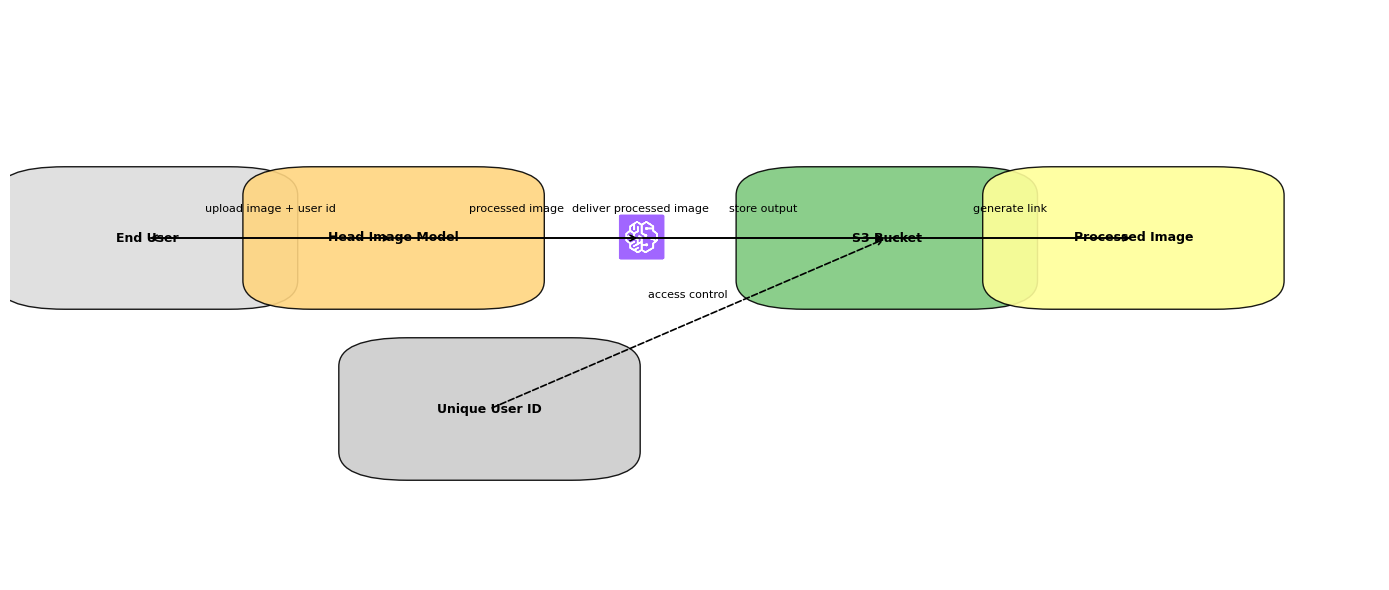

In [21]:
# /content/cloud/prompt_0002.json

import json
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
import os

# -------------------------
# Load JSON
# -------------------------
with open("/content/cloud/prompt_0002.json") as f:
    chat_data = json.load(f)

assistant_content = chat_data["messages"][-1]["content"]
diagram = json.loads(assistant_content)

fig, ax = plt.subplots(figsize=(14, 6))
ax.set_xlim(0, 1)
ax.set_ylim(0, 1)
ax.axis("off")

# -------------------------
# Parameters
# -------------------------
BOX_W, BOX_H = 0.12, 0.15
LOGO_SCALE = 0.3

# Define pipeline order manually (left → right)
pipeline_order = ["end_user", "model", "sagemaker", "s3", "download"]

# Position map
positions = {}
x_start, y_center = 0.1, 0.6
gap = 0.18

for i, eid in enumerate(pipeline_order):
    positions[eid] = (x_start + i * gap, y_center)

# Unique user ID goes below
positions["user_id"] = (0.35, 0.3)

# -------------------------
# Draw entity (logo or box)
# -------------------------
def add_entity(ent):
    x, y = positions[ent["id"]]
    x0, y0 = x - BOX_W/2, y - BOX_H/2
    x_center, y_center = x, y

    logo_drawn = False
    if "logo" in ent and ent["logo"]:
        try:
            if os.path.exists(ent["logo"]):
                img = plt.imread(ent["logo"])
                imagebox = OffsetImage(img, zoom=LOGO_SCALE)
                ab = AnnotationBbox(imagebox, (x_center, y_center), frameon=False)
                ax.add_artist(ab)
                logo_drawn = True
        except Exception as e:
            print(f"⚠️ Error loading logo {ent['label']}: {e}")

    if not logo_drawn:
        rect = mpatches.FancyBboxPatch(
            (x0, y0), BOX_W, BOX_H,
            boxstyle="round,pad=0.05",
            linewidth=1, edgecolor="black",
            facecolor=ent["style"].get("color", "#FFFFFF"),
            alpha=0.9
        )
        ax.add_patch(rect)
        ax.text(x_center, y_center,
                ent["label"],
                ha="center", va="center",
                fontsize=9, weight="bold", color="black")

# -------------------------
# Draw arrows
# -------------------------
def draw_relationship(rel):
    src = positions[rel["source"]]
    tgt = positions[rel["target"]]

    ax.annotate("",
                xy=tgt, xytext=src,
                arrowprops=dict(
                    arrowstyle="->",
                    color=rel["style"].get("color", "black"),
                    lw=1.2,
                    linestyle="--" if rel["style"].get("dash") == "dashed" else "-"
                ))

    # Label above arrow
    mx, my = (src[0] + tgt[0]) / 2, (src[1] + tgt[1]) / 2
    ax.text(mx, my + 0.05, rel["label"],
            fontsize=8, ha="center", va="center")

# -------------------------
# Render diagram
# -------------------------
for ent in diagram["entities"]:
    add_entity(ent)

for rel in diagram["relationships"]:
    draw_relationship(rel)

plt.tight_layout()
plt.show()




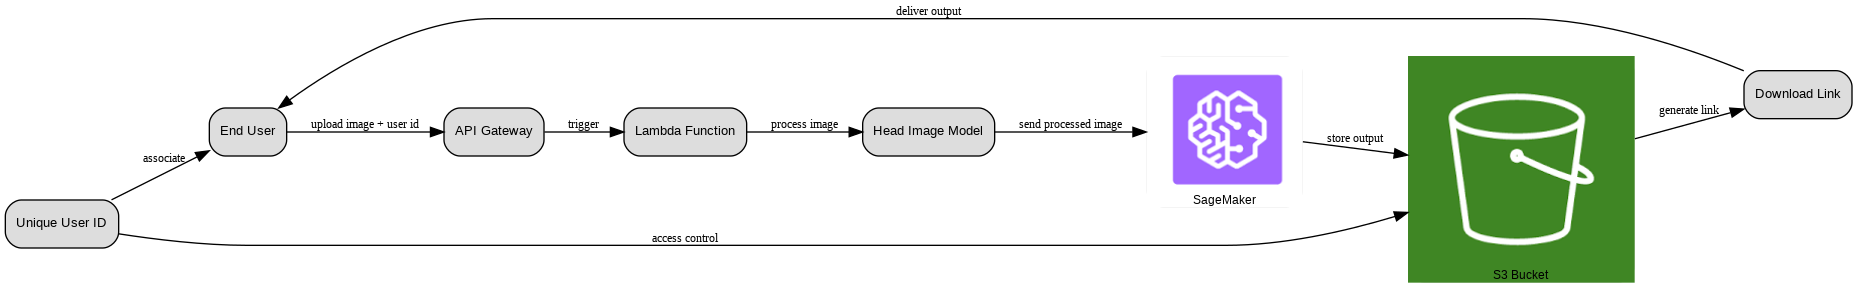

In [34]:
import json
from graphviz import Digraph
from IPython.display import Image, display
import os

# Load JSON file
with open("/content/cloud/prompt_0002.json", "r") as f:
    data = json.load(f)

# If your JSON has "messages" structure, extract assistant content
if "messages" in data:
    assistant_content = data["messages"][-1]["content"]
    diagram = json.loads(assistant_content)
else:
    diagram = data  # assume direct structure

# Create directed graph
dot = Digraph("Architecture", format="png")
dot.attr(rankdir="LR", bgcolor="white")
dot.attr("node", shape="rect", style="rounded,filled", fontname="Helvetica", fontsize="10")

# Add entities
for ent in diagram["entities"]:
    node_id = ent["id"]
    label = ent.get("label", node_id)
    logo = ent.get("logo", "")

    if logo and os.path.exists(logo):  # Logo exists
        dot.node(
            node_id,
            label=label,       # show label below
            image=logo,
            shape="none",      # no border
            labelloc="b",      # label below image
            fontsize="9",
            fixedsize="false",
            imagescale="true"
        )
    else:  # fallback to box with label
        dot.node(
            node_id,
            label=label,
            fillcolor="#DDDDDD",
            color="black"
        )

# Add relationships
for rel in diagram["relationships"]:
    style = rel.get("style", {})
    attrs = {}
    if style.get("dash") == "dashed":
        attrs["style"] = "dashed"
    dot.edge(rel["source"], rel["target"], label=rel["label"], fontsize="9")

# Render and display inline
png_bytes = dot.pipe(format="png")
display(Image(png_bytes))


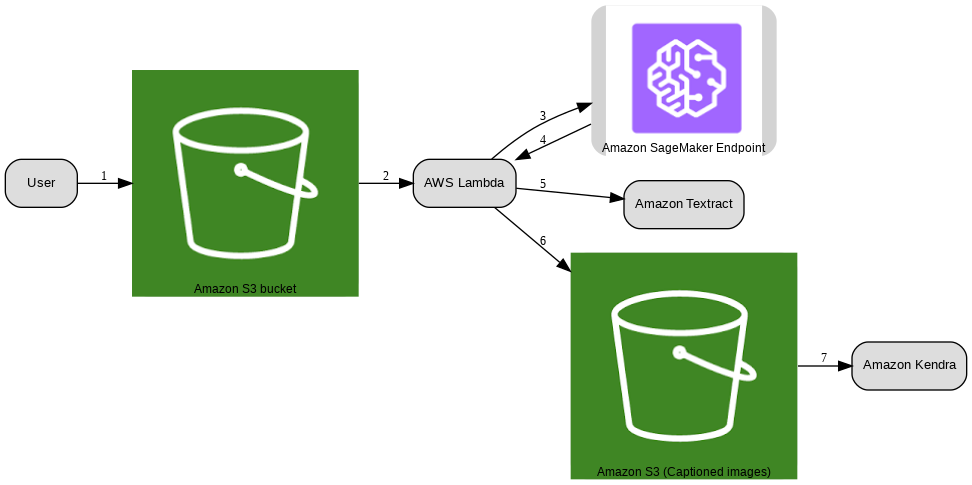

In [35]:
import json
from graphviz import Digraph
from IPython.display import Image, display
import os

# Load JSON file
with open("/content/cloud/prompt_0003.json", "r") as f:
    data = json.load(f)

# If your JSON has "messages" structure, extract assistant content
if "messages" in data:
    assistant_content = data["messages"][-1]["content"]
    diagram = json.loads(assistant_content)
else:
    diagram = data  # assume direct structure

# Create directed graph
dot = Digraph("Architecture", format="png")
dot.attr(rankdir="LR", bgcolor="white")
dot.attr("node", shape="rect", style="rounded,filled", fontname="Helvetica", fontsize="10")

# Add entities
for ent in diagram["entities"]:
    node_id = ent["id"]
    label = ent.get("label", node_id)
    logo = ent.get("logo", "")

    if logo and os.path.exists(logo):  # Logo exists
        dot.node(
            node_id,
            label=label,       # show label below
            image=logo,
            shape="none",      # no border
            labelloc="b",      # label below image
            fontsize="9",
            fixedsize="false",
            imagescale="true"
        )
    else:  # fallback to box with label
        dot.node(
            node_id,
            label=label,
            fillcolor="#DDDDDD",
            color="black"
        )

# Add relationships
for rel in diagram["relationships"]:
    style = rel.get("style", {})
    attrs = {}
    if style.get("dash") == "dashed":
        attrs["style"] = "dashed"
    dot.edge(rel["source"], rel["target"], label=rel["label"], fontsize="9")

# Render and display inline
png_bytes = dot.pipe(format="png")
display(Image(png_bytes))


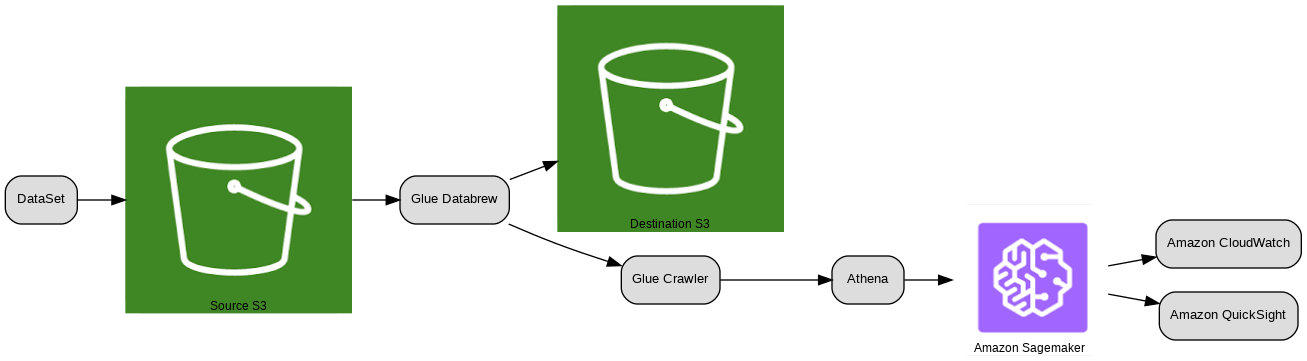

In [36]:
import json
from graphviz import Digraph
from IPython.display import Image, display
import os

# Load JSON file
with open("/content/cloud/prompt_0004.json", "r") as f:
    data = json.load(f)

# If your JSON has "messages" structure, extract assistant content
if "messages" in data:
    assistant_content = data["messages"][-1]["content"]
    diagram = json.loads(assistant_content)
else:
    diagram = data  # assume direct structure

# Create directed graph
dot = Digraph("Architecture", format="png")
dot.attr(rankdir="LR", bgcolor="white")
dot.attr("node", shape="rect", style="rounded,filled", fontname="Helvetica", fontsize="10")

# Add entities
for ent in diagram["entities"]:
    node_id = ent["id"]
    label = ent.get("label", node_id)
    logo = ent.get("logo", "")

    if logo and os.path.exists(logo):  # Logo exists
        dot.node(
            node_id,
            label=label,       # show label below
            image=logo,
            shape="none",      # no border
            labelloc="b",      # label below image
            fontsize="9",
            fixedsize="false",
            imagescale="true"
        )
    else:  # fallback to box with label
        dot.node(
            node_id,
            label=label,
            fillcolor="#DDDDDD",
            color="black"
        )

# Add relationships
for rel in diagram["relationships"]:
    style = rel.get("style", {})
    attrs = {}
    if style.get("dash") == "dashed":
        attrs["style"] = "dashed"
    dot.edge(rel["source"], rel["target"], label=rel["label"], fontsize="9")

# Render and display inline
png_bytes = dot.pipe(format="png")
display(Image(png_bytes))


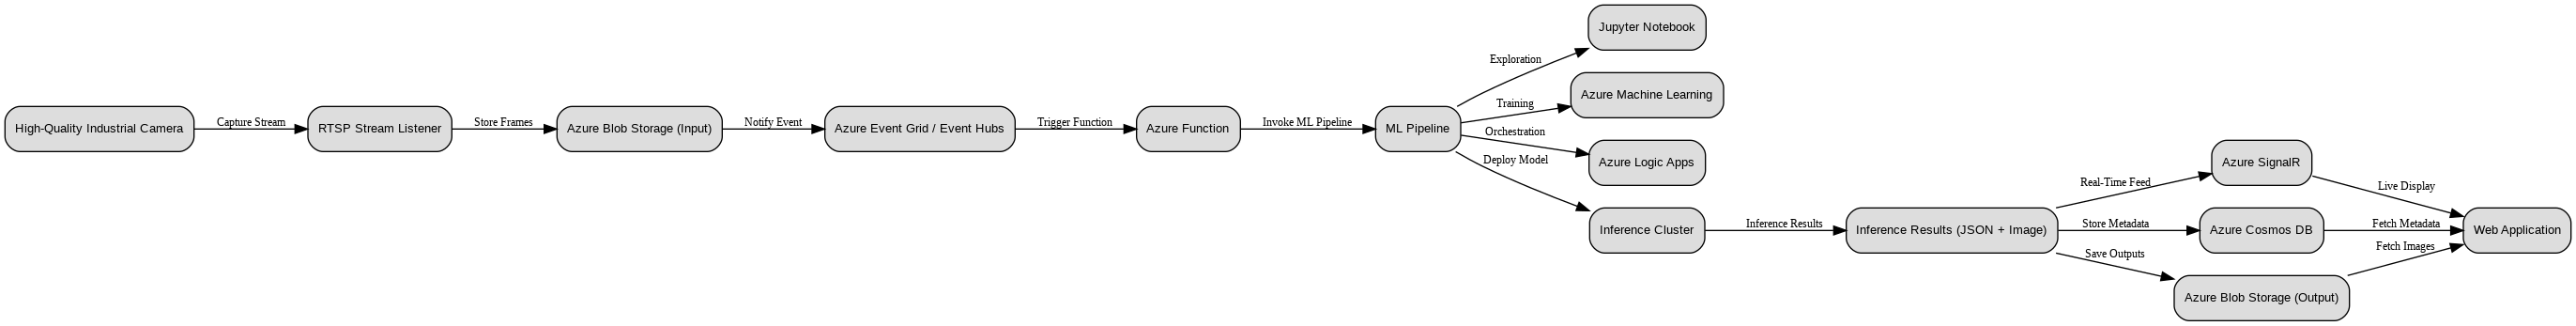

In [7]:
import json
from graphviz import Digraph
from IPython.display import Image, display
import os

# Load JSON file
with open("/content/cloud/prompt_0005.json", "r") as f:
    data = json.load(f)

# If your JSON has "messages" structure, extract assistant content
if "messages" in data:
    assistant_content = data["messages"][-1]["content"]
    diagram = json.loads(assistant_content)
else:
    diagram = data  # assume direct structure

# Create directed graph
dot = Digraph("Architecture", format="png")
dot.attr(rankdir="LR", bgcolor="white")
dot.attr("node", shape="rect", style="rounded,filled", fontname="Helvetica", fontsize="10")

# Add entities
for ent in diagram["entities"]:
    node_id = ent["id"]
    label = ent.get("label", node_id)
    logo = ent.get("logo", "")

    if logo and os.path.exists(logo):  # Logo exists
        dot.node(
            node_id,
            label=label,       # show label below
            image=logo,
            shape="none",      # no border
            labelloc="b",      # label below image
            fontsize="9",
            fixedsize="false",
            imagescale="true"
        )
    else:  # fallback to box with label
        dot.node(
            node_id,
            label=label,
            fillcolor="#DDDDDD",
            color="black"
        )

# Add relationships
for rel in diagram["relationships"]:
    style = rel.get("style", {})
    attrs = {}
    if style.get("dash") == "dashed":
        attrs["style"] = "dashed"
    dot.edge(rel["source"], rel["target"], label=rel["label"], fontsize="9")

# Render and display inline
png_bytes = dot.pipe(format="png")
display(Image(png_bytes))


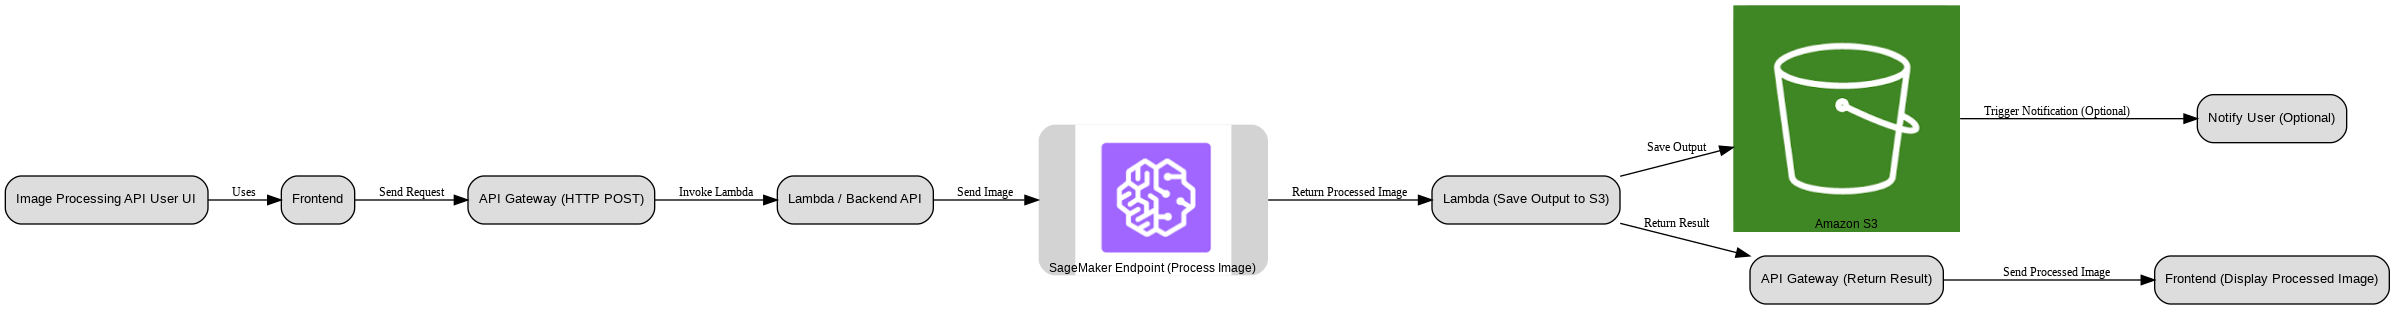

In [8]:
import json
from graphviz import Digraph
from IPython.display import Image, display
import os

# Load JSON file
with open("/content/cloud/prompt_0006.json", "r") as f:
    data = json.load(f)

# If your JSON has "messages" structure, extract assistant content
if "messages" in data:
    assistant_content = data["messages"][-1]["content"]
    diagram = json.loads(assistant_content)
else:
    diagram = data  # assume direct structure

# Create directed graph
dot = Digraph("Architecture", format="png")
dot.attr(rankdir="LR", bgcolor="white")
dot.attr("node", shape="rect", style="rounded,filled", fontname="Helvetica", fontsize="10")

# Add entities
for ent in diagram["entities"]:
    node_id = ent["id"]
    label = ent.get("label", node_id)
    logo = ent.get("logo", "")

    if logo and os.path.exists(logo):  # Logo exists
        dot.node(
            node_id,
            label=label,       # show label below
            image=logo,
            shape="none",      # no border
            labelloc="b",      # label below image
            fontsize="9",
            fixedsize="false",
            imagescale="true"
        )
    else:  # fallback to box with label
        dot.node(
            node_id,
            label=label,
            fillcolor="#DDDDDD",
            color="black"
        )

# Add relationships
for rel in diagram["relationships"]:
    style = rel.get("style", {})
    attrs = {}
    if style.get("dash") == "dashed":
        attrs["style"] = "dashed"
    dot.edge(rel["source"], rel["target"], label=rel["label"], fontsize="9")

# Render and display inline
png_bytes = dot.pipe(format="png")
display(Image(png_bytes))


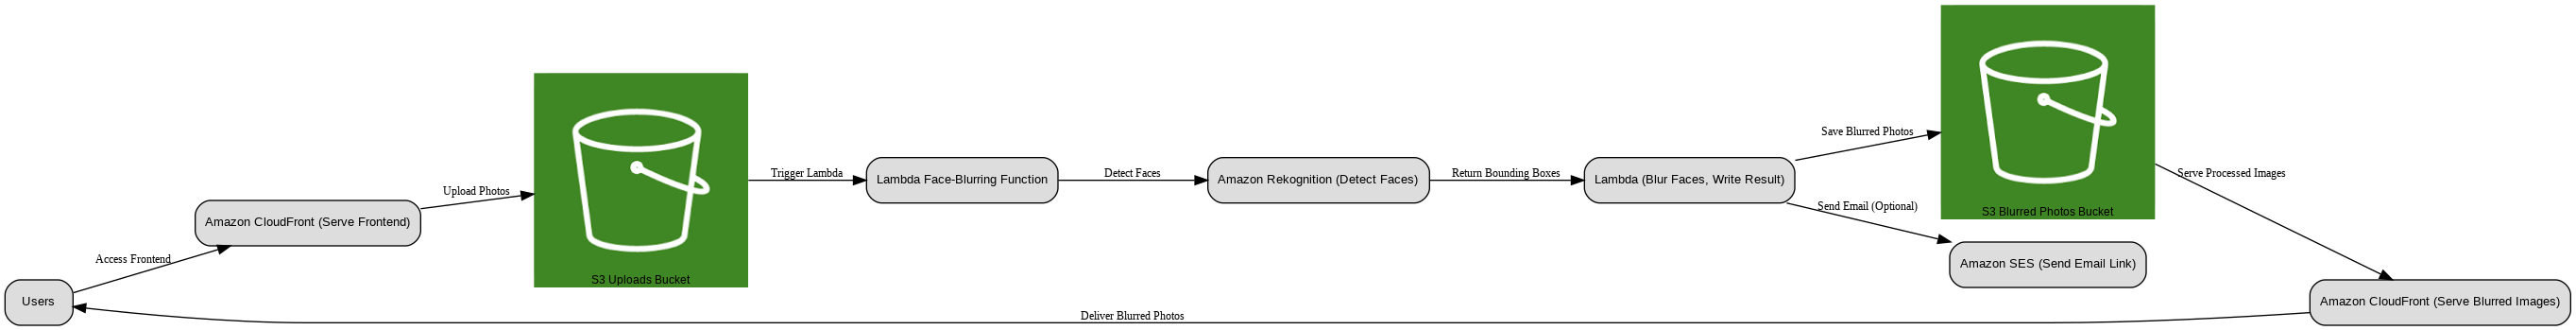

In [9]:
import json
from graphviz import Digraph
from IPython.display import Image, display
import os

# Load JSON file
with open("/content/cloud/prompt_0007.json", "r") as f:
    data = json.load(f)

# If your JSON has "messages" structure, extract assistant content
if "messages" in data:
    assistant_content = data["messages"][-1]["content"]
    diagram = json.loads(assistant_content)
else:
    diagram = data  # assume direct structure

# Create directed graph
dot = Digraph("Architecture", format="png")
dot.attr(rankdir="LR", bgcolor="white")
dot.attr("node", shape="rect", style="rounded,filled", fontname="Helvetica", fontsize="10")

# Add entities
for ent in diagram["entities"]:
    node_id = ent["id"]
    label = ent.get("label", node_id)
    logo = ent.get("logo", "")

    if logo and os.path.exists(logo):  # Logo exists
        dot.node(
            node_id,
            label=label,       # show label below
            image=logo,
            shape="none",      # no border
            labelloc="b",      # label below image
            fontsize="9",
            fixedsize="false",
            imagescale="true"
        )
    else:  # fallback to box with label
        dot.node(
            node_id,
            label=label,
            fillcolor="#DDDDDD",
            color="black"
        )

# Add relationships
for rel in diagram["relationships"]:
    style = rel.get("style", {})
    attrs = {}
    if style.get("dash") == "dashed":
        attrs["style"] = "dashed"
    dot.edge(rel["source"], rel["target"], label=rel["label"], fontsize="9")

# Render and display inline
png_bytes = dot.pipe(format="png")
display(Image(png_bytes))


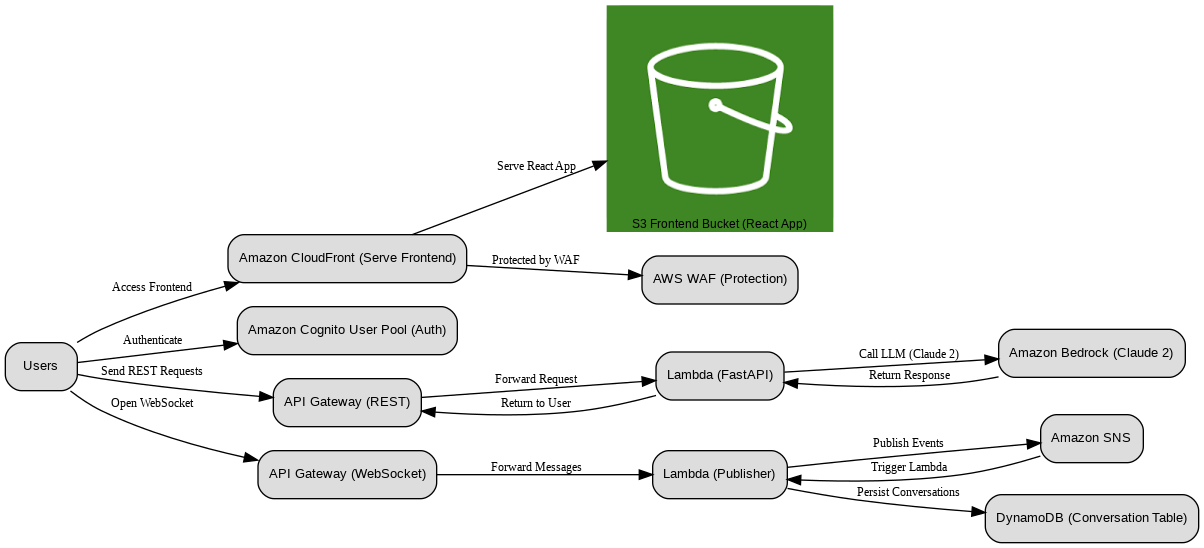

In [10]:
import json
from graphviz import Digraph
from IPython.display import Image, display
import os

# Load JSON file
with open("/content/cloud/prompt_0008.json", "r") as f:
    data = json.load(f)

# If your JSON has "messages" structure, extract assistant content
if "messages" in data:
    assistant_content = data["messages"][-1]["content"]
    diagram = json.loads(assistant_content)
else:
    diagram = data  # assume direct structure

# Create directed graph
dot = Digraph("Architecture", format="png")
dot.attr(rankdir="LR", bgcolor="white")
dot.attr("node", shape="rect", style="rounded,filled", fontname="Helvetica", fontsize="10")

# Add entities
for ent in diagram["entities"]:
    node_id = ent["id"]
    label = ent.get("label", node_id)
    logo = ent.get("logo", "")

    if logo and os.path.exists(logo):  # Logo exists
        dot.node(
            node_id,
            label=label,       # show label below
            image=logo,
            shape="none",      # no border
            labelloc="b",      # label below image
            fontsize="9",
            fixedsize="false",
            imagescale="true"
        )
    else:  # fallback to box with label
        dot.node(
            node_id,
            label=label,
            fillcolor="#DDDDDD",
            color="black"
        )

# Add relationships
for rel in diagram["relationships"]:
    style = rel.get("style", {})
    attrs = {}
    if style.get("dash") == "dashed":
        attrs["style"] = "dashed"
    dot.edge(rel["source"], rel["target"], label=rel["label"], fontsize="9")

# Render and display inline
png_bytes = dot.pipe(format="png")
display(Image(png_bytes))


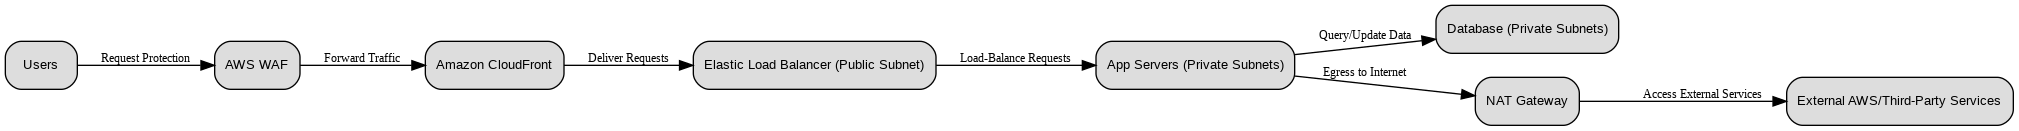

In [11]:
import json
from graphviz import Digraph
from IPython.display import Image, display
import os

# Load JSON file
with open("/content/cloud/prompt_0009.json", "r") as f:
    data = json.load(f)

# If your JSON has "messages" structure, extract assistant content
if "messages" in data:
    assistant_content = data["messages"][-1]["content"]
    diagram = json.loads(assistant_content)
else:
    diagram = data  # assume direct structure

# Create directed graph
dot = Digraph("Architecture", format="png")
dot.attr(rankdir="LR", bgcolor="white")
dot.attr("node", shape="rect", style="rounded,filled", fontname="Helvetica", fontsize="10")

# Add entities
for ent in diagram["entities"]:
    node_id = ent["id"]
    label = ent.get("label", node_id)
    logo = ent.get("logo", "")

    if logo and os.path.exists(logo):  # Logo exists
        dot.node(
            node_id,
            label=label,       # show label below
            image=logo,
            shape="none",      # no border
            labelloc="b",      # label below image
            fontsize="9",
            fixedsize="false",
            imagescale="true"
        )
    else:  # fallback to box with label
        dot.node(
            node_id,
            label=label,
            fillcolor="#DDDDDD",
            color="black"
        )

# Add relationships
for rel in diagram["relationships"]:
    style = rel.get("style", {})
    attrs = {}
    if style.get("dash") == "dashed":
        attrs["style"] = "dashed"
    dot.edge(rel["source"], rel["target"], label=rel["label"], fontsize="9")

# Render and display inline
png_bytes = dot.pipe(format="png")
display(Image(png_bytes))


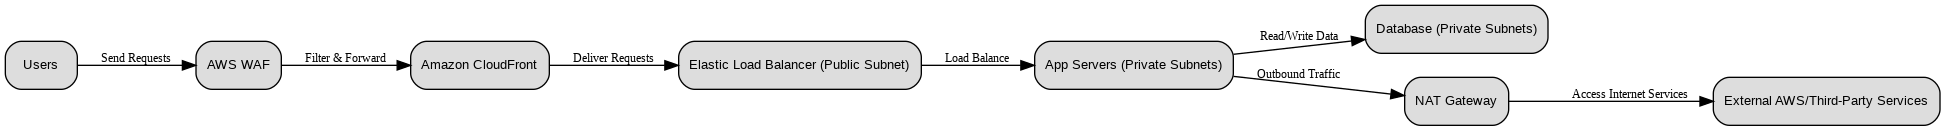

In [12]:
import json
from graphviz import Digraph
from IPython.display import Image, display
import os

# Load JSON file
with open("/content/cloud/prompt_0010.json", "r") as f:
    data = json.load(f)

# If your JSON has "messages" structure, extract assistant content
if "messages" in data:
    assistant_content = data["messages"][-1]["content"]
    diagram = json.loads(assistant_content)
else:
    diagram = data  # assume direct structure

# Create directed graph
dot = Digraph("Architecture", format="png")
dot.attr(rankdir="LR", bgcolor="white")
dot.attr("node", shape="rect", style="rounded,filled", fontname="Helvetica", fontsize="10")

# Add entities
for ent in diagram["entities"]:
    node_id = ent["id"]
    label = ent.get("label", node_id)
    logo = ent.get("logo", "")

    if logo and os.path.exists(logo):  # Logo exists
        dot.node(
            node_id,
            label=label,       # show label below
            image=logo,
            shape="none",      # no border
            labelloc="b",      # label below image
            fontsize="9",
            fixedsize="false",
            imagescale="true"
        )
    else:  # fallback to box with label
        dot.node(
            node_id,
            label=label,
            fillcolor="#DDDDDD",
            color="black"
        )

# Add relationships
for rel in diagram["relationships"]:
    style = rel.get("style", {})
    attrs = {}
    if style.get("dash") == "dashed":
        attrs["style"] = "dashed"
    dot.edge(rel["source"], rel["target"], label=rel["label"], fontsize="9")

# Render and display inline
png_bytes = dot.pipe(format="png")
display(Image(png_bytes))


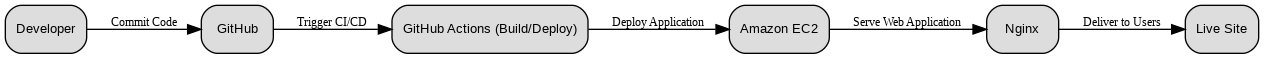

In [13]:
import json
from graphviz import Digraph
from IPython.display import Image, display
import os

# Load JSON file
with open("/content/cloud/prompt_0011.json", "r") as f:
    data = json.load(f)

# If your JSON has "messages" structure, extract assistant content
if "messages" in data:
    assistant_content = data["messages"][-1]["content"]
    diagram = json.loads(assistant_content)
else:
    diagram = data  # assume direct structure

# Create directed graph
dot = Digraph("Architecture", format="png")
dot.attr(rankdir="LR", bgcolor="white")
dot.attr("node", shape="rect", style="rounded,filled", fontname="Helvetica", fontsize="10")

# Add entities
for ent in diagram["entities"]:
    node_id = ent["id"]
    label = ent.get("label", node_id)
    logo = ent.get("logo", "")

    if logo and os.path.exists(logo):  # Logo exists
        dot.node(
            node_id,
            label=label,       # show label below
            image=logo,
            shape="none",      # no border
            labelloc="b",      # label below image
            fontsize="9",
            fixedsize="false",
            imagescale="true"
        )
    else:  # fallback to box with label
        dot.node(
            node_id,
            label=label,
            fillcolor="#DDDDDD",
            color="black"
        )

# Add relationships
for rel in diagram["relationships"]:
    style = rel.get("style", {})
    attrs = {}
    if style.get("dash") == "dashed":
        attrs["style"] = "dashed"
    dot.edge(rel["source"], rel["target"], label=rel["label"], fontsize="9")

# Render and display inline
png_bytes = dot.pipe(format="png")
display(Image(png_bytes))


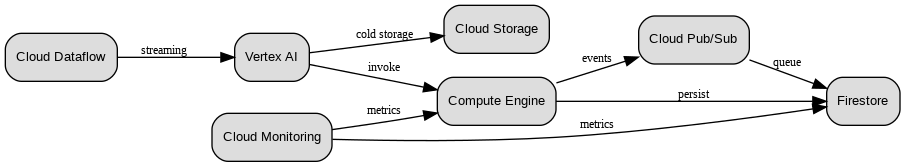

In [14]:
import json
from graphviz import Digraph
from IPython.display import Image, display
import os

# Load JSON file
with open("/content/cloud/prompt_0012.json", "r") as f:
    data = json.load(f)

# If your JSON has "messages" structure, extract assistant content
if "messages" in data:
    assistant_content = data["messages"][-1]["content"]
    diagram = json.loads(assistant_content)
else:
    diagram = data  # assume direct structure

# Create directed graph
dot = Digraph("Architecture", format="png")
dot.attr(rankdir="LR", bgcolor="white")
dot.attr("node", shape="rect", style="rounded,filled", fontname="Helvetica", fontsize="10")

# Add entities
for ent in diagram["entities"]:
    node_id = ent["id"]
    label = ent.get("label", node_id)
    logo = ent.get("logo", "")

    if logo and os.path.exists(logo):  # Logo exists
        dot.node(
            node_id,
            label=label,       # show label below
            image=logo,
            shape="none",      # no border
            labelloc="b",      # label below image
            fontsize="9",
            fixedsize="false",
            imagescale="true"
        )
    else:  # fallback to box with label
        dot.node(
            node_id,
            label=label,
            fillcolor="#DDDDDD",
            color="black"
        )

# Add relationships
for rel in diagram["relationships"]:
    style = rel.get("style", {})
    attrs = {}
    if style.get("dash") == "dashed":
        attrs["style"] = "dashed"
    dot.edge(rel["source"], rel["target"], label=rel["label"], fontsize="9")

# Render and display inline
png_bytes = dot.pipe(format="png")
display(Image(png_bytes))


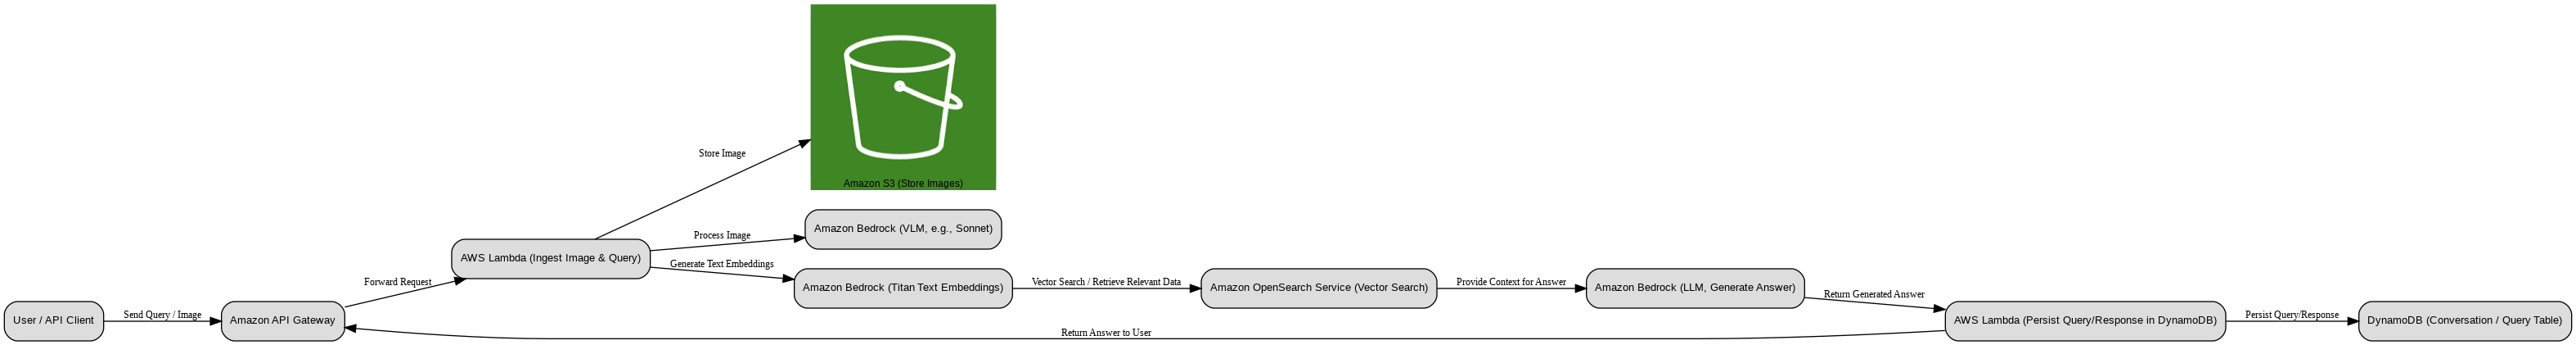

In [15]:
import json
from graphviz import Digraph
from IPython.display import Image, display
import os

# Load JSON file
with open("/content/cloud/prompt_0013.json", "r") as f:
    data = json.load(f)

# If your JSON has "messages" structure, extract assistant content
if "messages" in data:
    assistant_content = data["messages"][-1]["content"]
    diagram = json.loads(assistant_content)
else:
    diagram = data  # assume direct structure

# Create directed graph
dot = Digraph("Architecture", format="png")
dot.attr(rankdir="LR", bgcolor="white")
dot.attr("node", shape="rect", style="rounded,filled", fontname="Helvetica", fontsize="10")

# Add entities
for ent in diagram["entities"]:
    node_id = ent["id"]
    label = ent.get("label", node_id)
    logo = ent.get("logo", "")

    if logo and os.path.exists(logo):  # Logo exists
        dot.node(
            node_id,
            label=label,       # show label below
            image=logo,
            shape="none",      # no border
            labelloc="b",      # label below image
            fontsize="9",
            fixedsize="false",
            imagescale="true"
        )
    else:  # fallback to box with label
        dot.node(
            node_id,
            label=label,
            fillcolor="#DDDDDD",
            color="black"
        )

# Add relationships
for rel in diagram["relationships"]:
    style = rel.get("style", {})
    attrs = {}
    if style.get("dash") == "dashed":
        attrs["style"] = "dashed"
    dot.edge(rel["source"], rel["target"], label=rel["label"], fontsize="9")

# Render and display inline
png_bytes = dot.pipe(format="png")
display(Image(png_bytes))


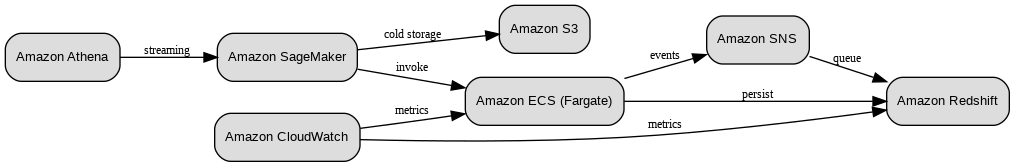

In [16]:
import json
from graphviz import Digraph
from IPython.display import Image, display
import os

# Load JSON file
with open("/content/cloud/prompt_0014.json", "r") as f:
    data = json.load(f)

# If your JSON has "messages" structure, extract assistant content
if "messages" in data:
    assistant_content = data["messages"][-1]["content"]
    diagram = json.loads(assistant_content)
else:
    diagram = data  # assume direct structure

# Create directed graph
dot = Digraph("Architecture", format="png")
dot.attr(rankdir="LR", bgcolor="white")
dot.attr("node", shape="rect", style="rounded,filled", fontname="Helvetica", fontsize="10")

# Add entities
for ent in diagram["entities"]:
    node_id = ent["id"]
    label = ent.get("label", node_id)
    logo = ent.get("logo", "")

    if logo and os.path.exists(logo):  # Logo exists
        dot.node(
            node_id,
            label=label,       # show label below
            image=logo,
            shape="none",      # no border
            labelloc="b",      # label below image
            fontsize="9",
            fixedsize="false",
            imagescale="true"
        )
    else:  # fallback to box with label
        dot.node(
            node_id,
            label=label,
            fillcolor="#DDDDDD",
            color="black"
        )

# Add relationships
for rel in diagram["relationships"]:
    style = rel.get("style", {})
    attrs = {}
    if style.get("dash") == "dashed":
        attrs["style"] = "dashed"
    dot.edge(rel["source"], rel["target"], label=rel["label"], fontsize="9")

# Render and display inline
png_bytes = dot.pipe(format="png")
display(Image(png_bytes))


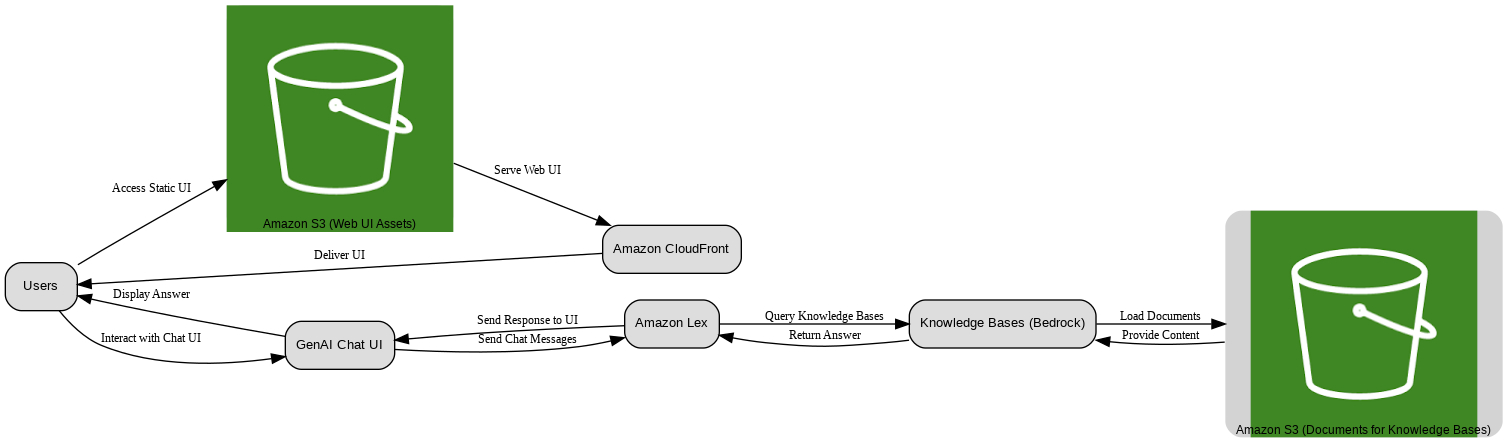

In [17]:
import json
from graphviz import Digraph
from IPython.display import Image, display
import os

# Load JSON file
with open("/content/cloud/prompt_0015.json", "r") as f:
    data = json.load(f)

# If your JSON has "messages" structure, extract assistant content
if "messages" in data:
    assistant_content = data["messages"][-1]["content"]
    diagram = json.loads(assistant_content)
else:
    diagram = data  # assume direct structure

# Create directed graph
dot = Digraph("Architecture", format="png")
dot.attr(rankdir="LR", bgcolor="white")
dot.attr("node", shape="rect", style="rounded,filled", fontname="Helvetica", fontsize="10")

# Add entities
for ent in diagram["entities"]:
    node_id = ent["id"]
    label = ent.get("label", node_id)
    logo = ent.get("logo", "")

    if logo and os.path.exists(logo):  # Logo exists
        dot.node(
            node_id,
            label=label,       # show label below
            image=logo,
            shape="none",      # no border
            labelloc="b",      # label below image
            fontsize="9",
            fixedsize="false",
            imagescale="true"
        )
    else:  # fallback to box with label
        dot.node(
            node_id,
            label=label,
            fillcolor="#DDDDDD",
            color="black"
        )

# Add relationships
for rel in diagram["relationships"]:
    style = rel.get("style", {})
    attrs = {}
    if style.get("dash") == "dashed":
        attrs["style"] = "dashed"
    dot.edge(rel["source"], rel["target"], label=rel["label"], fontsize="9")

# Render and display inline
png_bytes = dot.pipe(format="png")
display(Image(png_bytes))


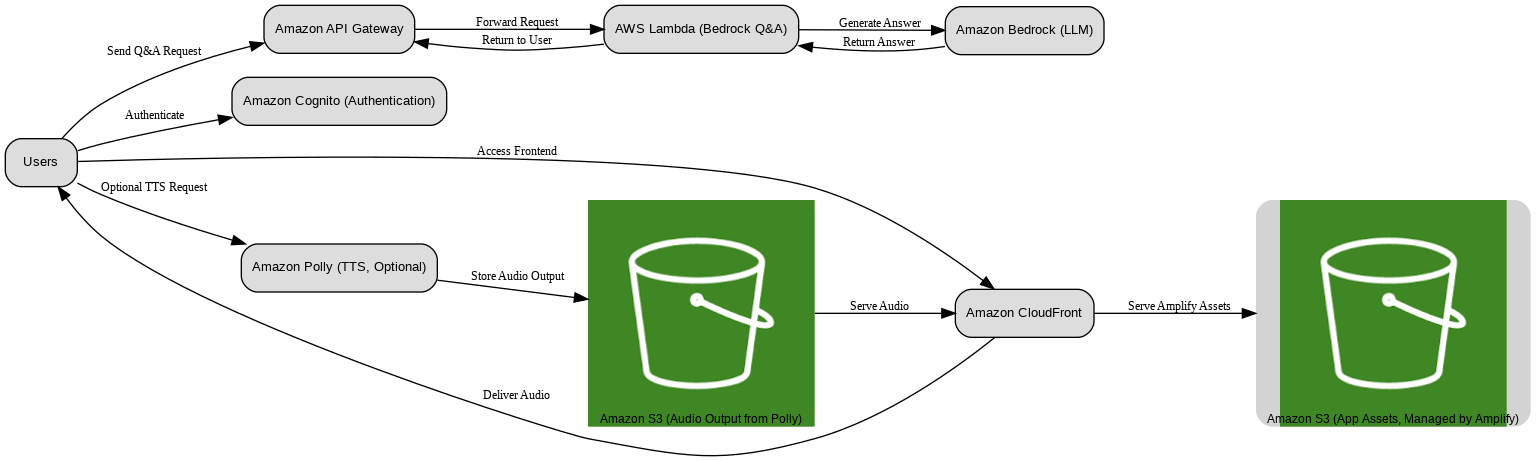

In [18]:
import json
from graphviz import Digraph
from IPython.display import Image, display
import os

# Load JSON file
with open("/content/cloud/prompt_0016.json", "r") as f:
    data = json.load(f)

# If your JSON has "messages" structure, extract assistant content
if "messages" in data:
    assistant_content = data["messages"][-1]["content"]
    diagram = json.loads(assistant_content)
else:
    diagram = data  # assume direct structure

# Create directed graph
dot = Digraph("Architecture", format="png")
dot.attr(rankdir="LR", bgcolor="white")
dot.attr("node", shape="rect", style="rounded,filled", fontname="Helvetica", fontsize="10")

# Add entities
for ent in diagram["entities"]:
    node_id = ent["id"]
    label = ent.get("label", node_id)
    logo = ent.get("logo", "")

    if logo and os.path.exists(logo):  # Logo exists
        dot.node(
            node_id,
            label=label,       # show label below
            image=logo,
            shape="none",      # no border
            labelloc="b",      # label below image
            fontsize="9",
            fixedsize="false",
            imagescale="true"
        )
    else:  # fallback to box with label
        dot.node(
            node_id,
            label=label,
            fillcolor="#DDDDDD",
            color="black"
        )

# Add relationships
for rel in diagram["relationships"]:
    style = rel.get("style", {})
    attrs = {}
    if style.get("dash") == "dashed":
        attrs["style"] = "dashed"
    dot.edge(rel["source"], rel["target"], label=rel["label"], fontsize="9")

# Render and display inline
png_bytes = dot.pipe(format="png")
display(Image(png_bytes))


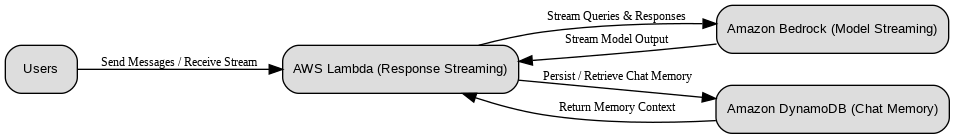

In [19]:
import json
from graphviz import Digraph
from IPython.display import Image, display
import os

# Load JSON file
with open("/content/cloud/prompt_0017.json", "r") as f:
    data = json.load(f)

# If your JSON has "messages" structure, extract assistant content
if "messages" in data:
    assistant_content = data["messages"][-1]["content"]
    diagram = json.loads(assistant_content)
else:
    diagram = data  # assume direct structure

# Create directed graph
dot = Digraph("Architecture", format="png")
dot.attr(rankdir="LR", bgcolor="white")
dot.attr("node", shape="rect", style="rounded,filled", fontname="Helvetica", fontsize="10")

# Add entities
for ent in diagram["entities"]:
    node_id = ent["id"]
    label = ent.get("label", node_id)
    logo = ent.get("logo", "")

    if logo and os.path.exists(logo):  # Logo exists
        dot.node(
            node_id,
            label=label,       # show label below
            image=logo,
            shape="none",      # no border
            labelloc="b",      # label below image
            fontsize="9",
            fixedsize="false",
            imagescale="true"
        )
    else:  # fallback to box with label
        dot.node(
            node_id,
            label=label,
            fillcolor="#DDDDDD",
            color="black"
        )

# Add relationships
for rel in diagram["relationships"]:
    style = rel.get("style", {})
    attrs = {}
    if style.get("dash") == "dashed":
        attrs["style"] = "dashed"
    dot.edge(rel["source"], rel["target"], label=rel["label"], fontsize="9")

# Render and display inline
png_bytes = dot.pipe(format="png")
display(Image(png_bytes))


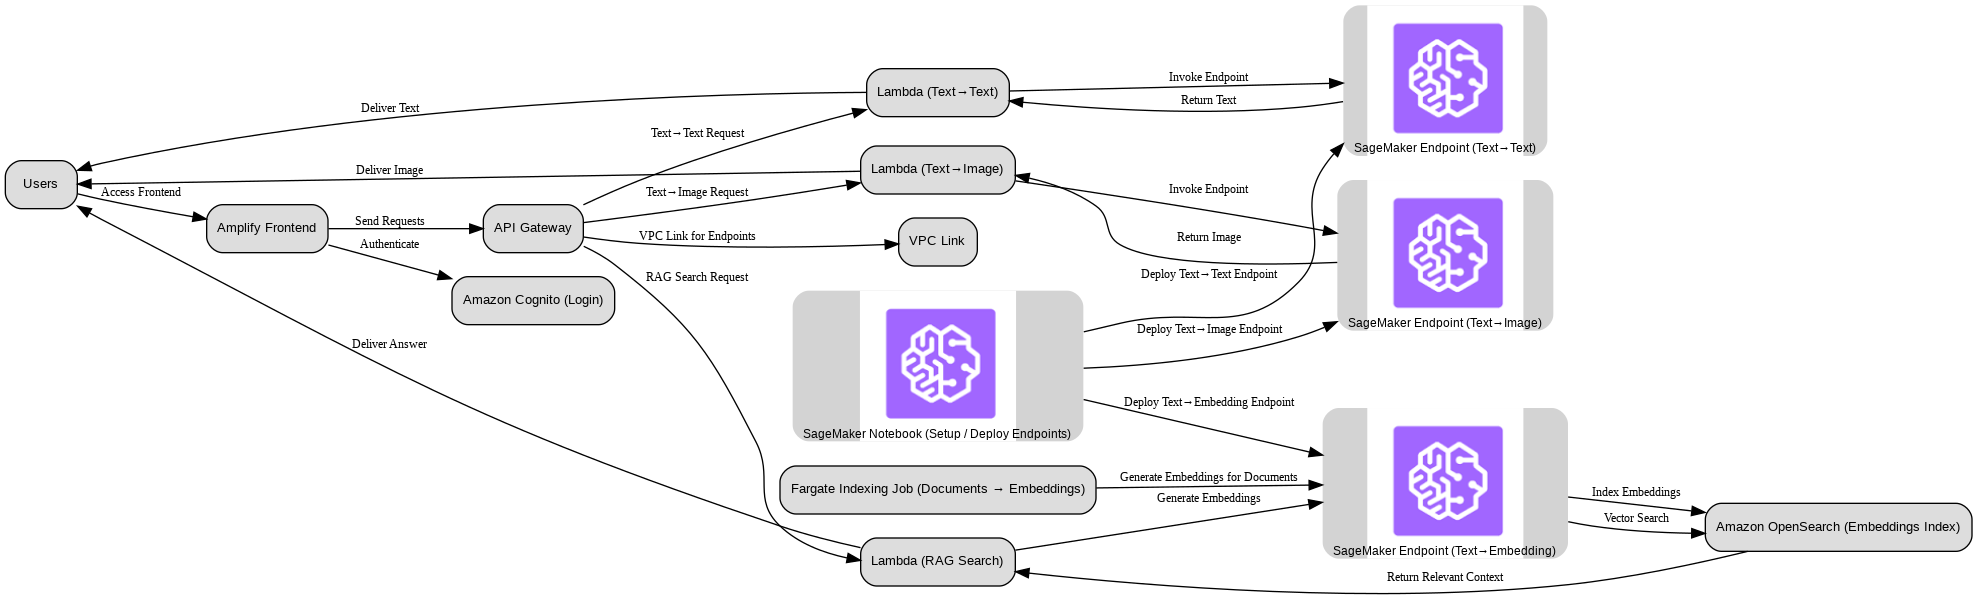

In [20]:
import json
from graphviz import Digraph
from IPython.display import Image, display
import os

# Load JSON file
with open("/content/cloud/prompt_0018.json", "r") as f:
    data = json.load(f)

# If your JSON has "messages" structure, extract assistant content
if "messages" in data:
    assistant_content = data["messages"][-1]["content"]
    diagram = json.loads(assistant_content)
else:
    diagram = data  # assume direct structure

# Create directed graph
dot = Digraph("Architecture", format="png")
dot.attr(rankdir="LR", bgcolor="white")
dot.attr("node", shape="rect", style="rounded,filled", fontname="Helvetica", fontsize="10")

# Add entities
for ent in diagram["entities"]:
    node_id = ent["id"]
    label = ent.get("label", node_id)
    logo = ent.get("logo", "")

    if logo and os.path.exists(logo):  # Logo exists
        dot.node(
            node_id,
            label=label,       # show label below
            image=logo,
            shape="none",      # no border
            labelloc="b",      # label below image
            fontsize="9",
            fixedsize="false",
            imagescale="true"
        )
    else:  # fallback to box with label
        dot.node(
            node_id,
            label=label,
            fillcolor="#DDDDDD",
            color="black"
        )

# Add relationships
for rel in diagram["relationships"]:
    style = rel.get("style", {})
    attrs = {}
    if style.get("dash") == "dashed":
        attrs["style"] = "dashed"
    dot.edge(rel["source"], rel["target"], label=rel["label"], fontsize="9")

# Render and display inline
png_bytes = dot.pipe(format="png")
display(Image(png_bytes))


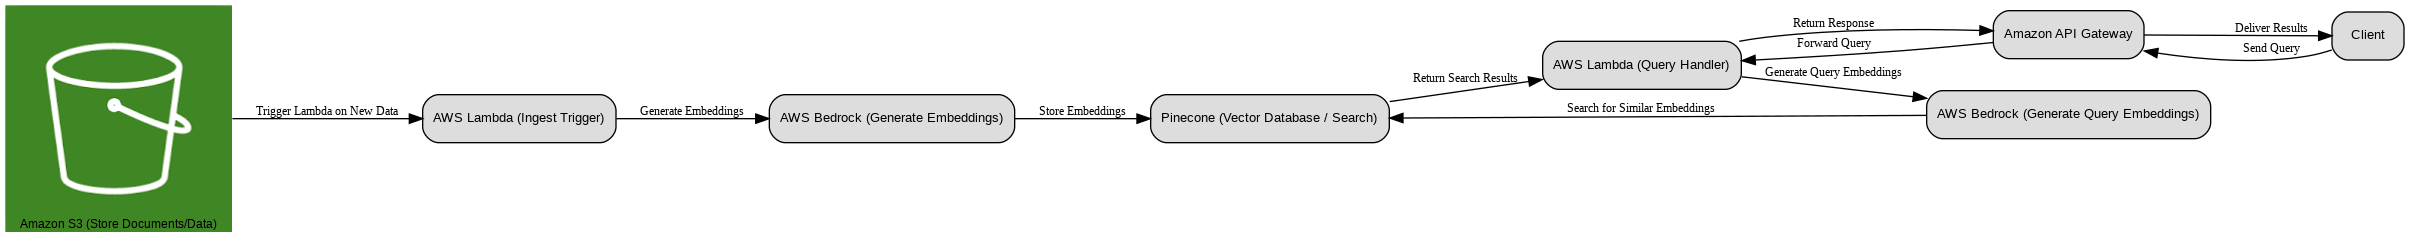

In [21]:
import json
from graphviz import Digraph
from IPython.display import Image, display
import os

# Load JSON file
with open("/content/cloud/prompt_0019.json", "r") as f:
    data = json.load(f)

# If your JSON has "messages" structure, extract assistant content
if "messages" in data:
    assistant_content = data["messages"][-1]["content"]
    diagram = json.loads(assistant_content)
else:
    diagram = data  # assume direct structure

# Create directed graph
dot = Digraph("Architecture", format="png")
dot.attr(rankdir="LR", bgcolor="white")
dot.attr("node", shape="rect", style="rounded,filled", fontname="Helvetica", fontsize="10")

# Add entities
for ent in diagram["entities"]:
    node_id = ent["id"]
    label = ent.get("label", node_id)
    logo = ent.get("logo", "")

    if logo and os.path.exists(logo):  # Logo exists
        dot.node(
            node_id,
            label=label,       # show label below
            image=logo,
            shape="none",      # no border
            labelloc="b",      # label below image
            fontsize="9",
            fixedsize="false",
            imagescale="true"
        )
    else:  # fallback to box with label
        dot.node(
            node_id,
            label=label,
            fillcolor="#DDDDDD",
            color="black"
        )

# Add relationships
for rel in diagram["relationships"]:
    style = rel.get("style", {})
    attrs = {}
    if style.get("dash") == "dashed":
        attrs["style"] = "dashed"
    dot.edge(rel["source"], rel["target"], label=rel["label"], fontsize="9")

# Render and display inline
png_bytes = dot.pipe(format="png")
display(Image(png_bytes))


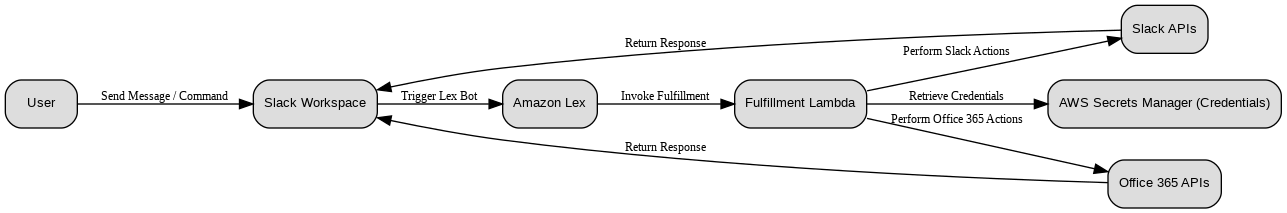

In [22]:
import json
from graphviz import Digraph
from IPython.display import Image, display
import os

# Load JSON file
with open("/content/cloud/prompt_0020.json", "r") as f:
    data = json.load(f)

# If your JSON has "messages" structure, extract assistant content
if "messages" in data:
    assistant_content = data["messages"][-1]["content"]
    diagram = json.loads(assistant_content)
else:
    diagram = data  # assume direct structure

# Create directed graph
dot = Digraph("Architecture", format="png")
dot.attr(rankdir="LR", bgcolor="white")
dot.attr("node", shape="rect", style="rounded,filled", fontname="Helvetica", fontsize="10")

# Add entities
for ent in diagram["entities"]:
    node_id = ent["id"]
    label = ent.get("label", node_id)
    logo = ent.get("logo", "")

    if logo and os.path.exists(logo):  # Logo exists
        dot.node(
            node_id,
            label=label,       # show label below
            image=logo,
            shape="none",      # no border
            labelloc="b",      # label below image
            fontsize="9",
            fixedsize="false",
            imagescale="true"
        )
    else:  # fallback to box with label
        dot.node(
            node_id,
            label=label,
            fillcolor="#DDDDDD",
            color="black"
        )

# Add relationships
for rel in diagram["relationships"]:
    style = rel.get("style", {})
    attrs = {}
    if style.get("dash") == "dashed":
        attrs["style"] = "dashed"
    dot.edge(rel["source"], rel["target"], label=rel["label"], fontsize="9")

# Render and display inline
png_bytes = dot.pipe(format="png")
display(Image(png_bytes))


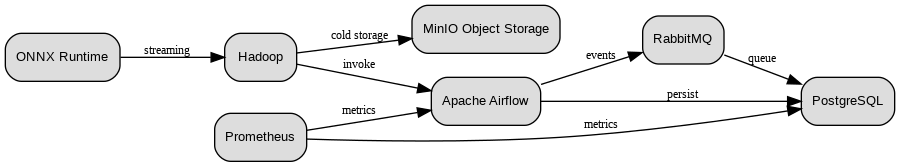

In [23]:
import json
from graphviz import Digraph
from IPython.display import Image, display
import os

# Load JSON file
with open("/content/cloud/prompt_0021.json", "r") as f:
    data = json.load(f)

# If your JSON has "messages" structure, extract assistant content
if "messages" in data:
    assistant_content = data["messages"][-1]["content"]
    diagram = json.loads(assistant_content)
else:
    diagram = data  # assume direct structure

# Create directed graph
dot = Digraph("Architecture", format="png")
dot.attr(rankdir="LR", bgcolor="white")
dot.attr("node", shape="rect", style="rounded,filled", fontname="Helvetica", fontsize="10")

# Add entities
for ent in diagram["entities"]:
    node_id = ent["id"]
    label = ent.get("label", node_id)
    logo = ent.get("logo", "")

    if logo and os.path.exists(logo):  # Logo exists
        dot.node(
            node_id,
            label=label,       # show label below
            image=logo,
            shape="none",      # no border
            labelloc="b",      # label below image
            fontsize="9",
            fixedsize="false",
            imagescale="true"
        )
    else:  # fallback to box with label
        dot.node(
            node_id,
            label=label,
            fillcolor="#DDDDDD",
            color="black"
        )

# Add relationships
for rel in diagram["relationships"]:
    style = rel.get("style", {})
    attrs = {}
    if style.get("dash") == "dashed":
        attrs["style"] = "dashed"
    dot.edge(rel["source"], rel["target"], label=rel["label"], fontsize="9")

# Render and display inline
png_bytes = dot.pipe(format="png")
display(Image(png_bytes))


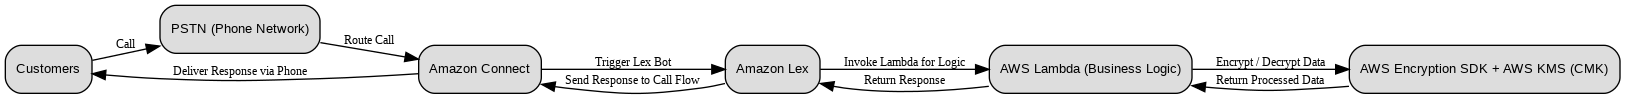

In [24]:
import json
from graphviz import Digraph
from IPython.display import Image, display
import os

# Load JSON file
with open("/content/cloud/prompt_0022.json", "r") as f:
    data = json.load(f)

# If your JSON has "messages" structure, extract assistant content
if "messages" in data:
    assistant_content = data["messages"][-1]["content"]
    diagram = json.loads(assistant_content)
else:
    diagram = data  # assume direct structure

# Create directed graph
dot = Digraph("Architecture", format="png")
dot.attr(rankdir="LR", bgcolor="white")
dot.attr("node", shape="rect", style="rounded,filled", fontname="Helvetica", fontsize="10")

# Add entities
for ent in diagram["entities"]:
    node_id = ent["id"]
    label = ent.get("label", node_id)
    logo = ent.get("logo", "")

    if logo and os.path.exists(logo):  # Logo exists
        dot.node(
            node_id,
            label=label,       # show label below
            image=logo,
            shape="none",      # no border
            labelloc="b",      # label below image
            fontsize="9",
            fixedsize="false",
            imagescale="true"
        )
    else:  # fallback to box with label
        dot.node(
            node_id,
            label=label,
            fillcolor="#DDDDDD",
            color="black"
        )

# Add relationships
for rel in diagram["relationships"]:
    style = rel.get("style", {})
    attrs = {}
    if style.get("dash") == "dashed":
        attrs["style"] = "dashed"
    dot.edge(rel["source"], rel["target"], label=rel["label"], fontsize="9")

# Render and display inline
png_bytes = dot.pipe(format="png")
display(Image(png_bytes))


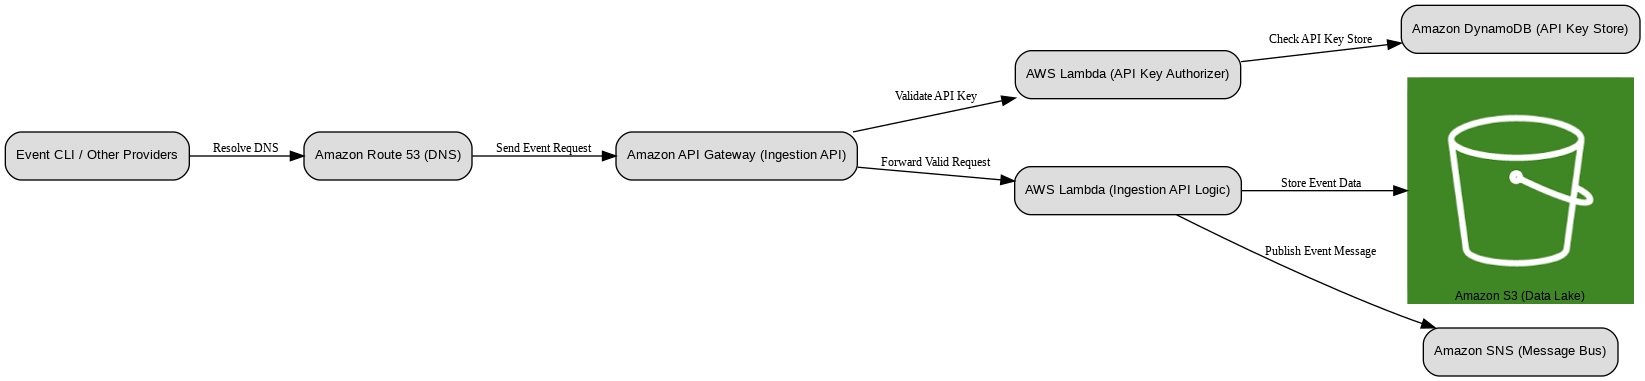

In [33]:
import json
from graphviz import Digraph
from IPython.display import Image, display
import os

# Load JSON file
with open("/content/cloud/prompt_0023.json", "r") as f:
    data = json.load(f)

# If your JSON has "messages" structure, extract assistant content
if "messages" in data:
    assistant_content = data["messages"][-1]["content"]
    diagram = json.loads(assistant_content)
else:
    diagram = data  # assume direct structure

# Create directed graph
dot = Digraph("Architecture", format="png")
dot.attr(rankdir="LR", bgcolor="white")
dot.attr("node", shape="rect", style="rounded,filled", fontname="Helvetica", fontsize="10")

# Add entities
for ent in diagram["entities"]:
    node_id = ent["id"]
    label = ent.get("label", node_id)
    logo = ent.get("logo", "")

    if logo and os.path.exists(logo):  # Logo exists
        dot.node(
            node_id,
            label=label,       # show label below
            image=logo,
            shape="none",      # no border
            labelloc="b",      # label below image
            fontsize="9",
            fixedsize="false",
            imagescale="true"
        )
    else:  # fallback to box with label
        dot.node(
            node_id,
            label=label,
            fillcolor="#DDDDDD",
            color="black"
        )

# Add relationships
for rel in diagram["relationships"]:
    style = rel.get("style", {})
    attrs = {}
    if style.get("dash") == "dashed":
        attrs["style"] = "dashed"
    dot.edge(rel["source"], rel["target"], label=rel["label"], fontsize="9")

# Render and display inline
png_bytes = dot.pipe(format="png")
display(Image(png_bytes))


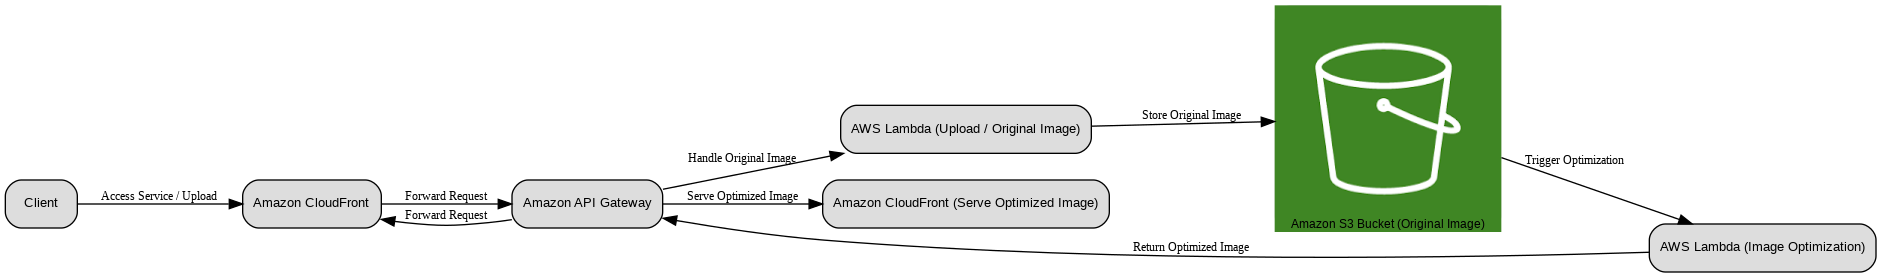

In [32]:
import json
from graphviz import Digraph
from IPython.display import Image, display
import os

# Load JSON file
with open("/content/cloud/prompt_0024.json", "r") as f:
    data = json.load(f)

# If your JSON has "messages" structure, extract assistant content
if "messages" in data:
    assistant_content = data["messages"][-1]["content"]
    diagram = json.loads(assistant_content)
else:
    diagram = data  # assume direct structure

# Create directed graph
dot = Digraph("Architecture", format="png")
dot.attr(rankdir="LR", bgcolor="white")
dot.attr("node", shape="rect", style="rounded,filled", fontname="Helvetica", fontsize="10")

# Add entities
for ent in diagram["entities"]:
    node_id = ent["id"]
    label = ent.get("label", node_id)
    logo = ent.get("logo", "")

    if logo and os.path.exists(logo):  # Logo exists
        dot.node(
            node_id,
            label=label,       # show label below
            image=logo,
            shape="none",      # no border
            labelloc="b",      # label below image
            fontsize="9",
            fixedsize="false",
            imagescale="true"
        )
    else:  # fallback to box with label
        dot.node(
            node_id,
            label=label,
            fillcolor="#DDDDDD",
            color="black"
        )

# Add relationships
for rel in diagram["relationships"]:
    style = rel.get("style", {})
    attrs = {}
    if style.get("dash") == "dashed":
        attrs["style"] = "dashed"
    dot.edge(rel["source"], rel["target"], label=rel["label"], fontsize="9")

# Render and display inline
png_bytes = dot.pipe(format="png")
display(Image(png_bytes))


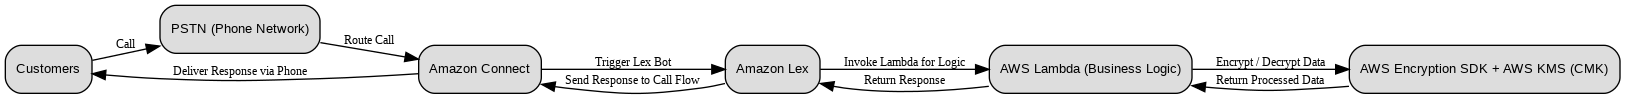

In [29]:
import json
from graphviz import Digraph
from IPython.display import Image, display
import os

# Load JSON file
with open("/content/cloud/prompt_0025.json", "r") as f:
    data = json.load(f)

# If your JSON has "messages" structure, extract assistant content
if "messages" in data:
    assistant_content = data["messages"][-1]["content"]
    diagram = json.loads(assistant_content)
else:
    diagram = data  # assume direct structure

# Create directed graph
dot = Digraph("Architecture", format="png")
dot.attr(rankdir="LR", bgcolor="white")
dot.attr("node", shape="rect", style="rounded,filled", fontname="Helvetica", fontsize="10")

# Add entities
for ent in diagram["entities"]:
    node_id = ent["id"]
    label = ent.get("label", node_id)
    logo = ent.get("logo", "")

    if logo and os.path.exists(logo):  # Logo exists
        dot.node(
            node_id,
            label=label,       # show label below
            image=logo,
            shape="none",      # no border
            labelloc="b",      # label below image
            fontsize="9",
            fixedsize="false",
            imagescale="true"
        )
    else:  # fallback to box with label
        dot.node(
            node_id,
            label=label,
            fillcolor="#DDDDDD",
            color="black"
        )

# Add relationships
for rel in diagram["relationships"]:
    style = rel.get("style", {})
    attrs = {}
    if style.get("dash") == "dashed":
        attrs["style"] = "dashed"
    dot.edge(rel["source"], rel["target"], label=rel["label"], fontsize="9")

# Render and display inline
png_bytes = dot.pipe(format="png")
display(Image(png_bytes))
